# 05. Retention Strategy Simulation

In [7]:
# import libraries & data
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression

df = pd.read_csv("../data/telco_churn.csv")
df["churn_flag"] = (df["Churn"] == "Yes").astype(int)

In [8]:
# Predict churn using `tenure` and `MonthlyCharges`
X = df[["tenure", "MonthlyCharges"]]
y = df["churn_flag"]

model = LogisticRegression(max_iter=1000)
model.fit(X, y)

df["churn_probability"] = model.predict_proba(X)[:, 1]
df["expected_revenue_loss"] = df["churn_probability"] * df["MonthlyCharges"]

df = df.sort_values("expected_revenue_loss", ascending=False).reset_index(drop=True)


## Retention Strategy Assumptions

- Retention offers are assumed to reduce churn probability by a fixed proportion among targeted customers.
- The cost of a retention offer is assumed to be a fixed amount per customer.
- Revenue saved is calculated as the reduction in expected revenue loss.

These assumptions are simplified and intended for comparative decision-making rather than precise forecasting.

In [9]:
retention_cost_per_customer = 10      # assumed monthly incentive
retention_effectiveness = 0.30        # 30% reduction in churn probability

total_customers = len(df)

In [10]:
strategies = {
    "Top 10% Risk": 0.10,
    "Top 20% Risk": 0.20,
    "Top 40% Risk": 0.40,
    "No Intervention": 0.00
}

results = []

for name, pct in strategies.items():
    n_target = int(total_customers * pct)
    targeted = df.iloc[:n_target]

    baseline_loss = targeted["expected_revenue_loss"].sum()
    reduced_loss = baseline_loss * (1 - retention_effectiveness)
    revenue_saved = baseline_loss - reduced_loss

    cost = n_target * retention_cost_per_customer
    roi = revenue_saved / cost if cost > 0 else np.nan

    results.append({
        "Strategy": name,
        "Customers Targeted": n_target,
        "Revenue Saved": revenue_saved,
        "Cost": cost,
        "ROI": roi
    })

results_df = pd.DataFrame(results)
results_df

,Strategy,Customers Targeted,Revenue Saved,Cost,ROI
0,Top 10% Risk,704,13103.450728,7040,1.861286
1,Top 20% Risk,1408,22475.762972,14080,1.596290
2,Top 40% Risk,2817,33778.900992,28170,1.199109
3,No Intervention,0,0.000000,0,NaN


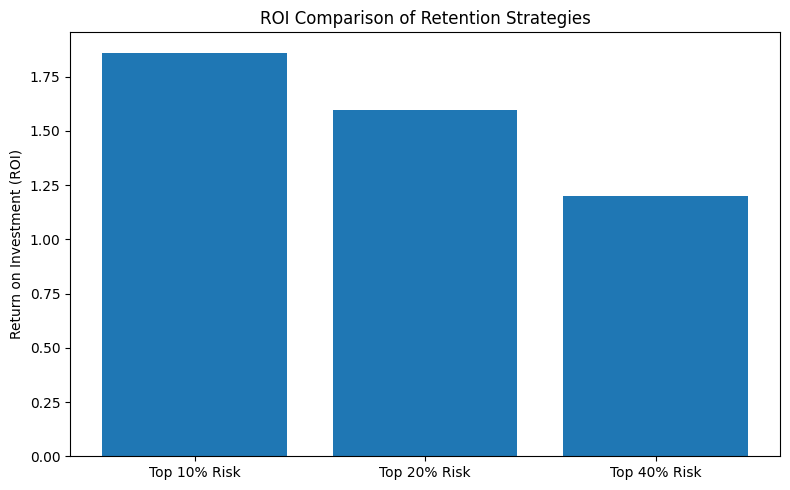

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(results_df["Strategy"], results_df["ROI"])
plt.ylabel("Return on Investment (ROI)")
plt.title("ROI Comparison of Retention Strategies")
plt.tight_layout()
plt.show()

## Recommendation

Retention efforts should focus on customers with the highest expected revenue loss rather than applying incentives broadly.

Targeting the top 10% of at-risk customers provides the strongest return on investment and is the most cost-efficient option. Expanding the program to the top 20% increases total revenue saved, but with a clear drop in efficiency.

Beyond this point, returns diminish as lower-risk customers are included. Wider targeting should only be considered if the business prioritizes revenue preservation over cost efficiency.

Retention thresholds should be revisited periodically as customer behavior, pricing, and incentive costs evolve.